# Question 1
## "red sky in the morning, sailor take warning"

----

From the definition, Independent Event means the outcome of one event does not affect the outcome of the other:

$$
P(A\cap B) = P(A) \cdot P(B)
$$

Where event **A** is "red sky" and event **B** is "storm".

$$ P(A) = (10+40)/(10+40+X+60) = 50/(110+X) $$
$$ P(B) = (10+X)/(10+40+X+60) = (10+X)/(110+X) $$
$$ P(A\cap B) = 10/(10+40+X+60) = 10/(110+X) $$

Then
$ X = 15 $ 

The Pearson's **Chi-Squared Test** can be used to determine if the storm weather is independent from the red sky.

In [20]:
import numpy as np
from scipy.stats import chi2_contingency

# Assuming the X is 5, then
obs = np.array([[10, 5], [40, 60]])
stat, p, dof, expected = chi2_contingency(obs)
print('The test statistic: {:0.4f}'.format(stat))
print('The p-value: {:0.4f}'.format(p))
print('The degree of freedom: {:0.4f}'.format(dof))
print('The expected value: {}'.format(expected))

The test statistic: 2.7672
The p-value: 0.0962
The degree of freedom: 1.0000
The expected value: [[ 6.52173913  8.47826087]
 [43.47826087 56.52173913]]


$H_0$ hypothesis: Storm is indenpendent to red sky.

$H_1$ hypothesis: Storm is dependent to red sky.

In [21]:
# If alpha is given as 0.05
alpha = 0.05 
if p <= alpha:
  print('Reject H0 hypothesis. Dependent')
else:
  print('Fail to reject H0 hypothesis. Independent')

Fail to reject H0 hypothesis. Independent


# Question 2
## Testing Apple tree group differences

----

Read file

In [22]:
import pandas as pd

filepath = "AppleData.dat"
df_dat = pd.read_table(filepath)
df_dat

,SEASON 1
0,treated
1,"[488.0, 541.0, 494.0, 536.0, 417.0, 471.0, 421..."
2,untreated
3,"[458.0, 583.0, 478.0, 562.0, 577.0, 399.0, 416..."
4,SEASON 2
5,treated
6,"[455.0, 435.0, 543.0, 469.0, 503.0, 458.0, 467..."
7,untreated
8,"[436.0, 512.0, 523.0, 444.0, 394.0, 508.0, 457..."


In [23]:
def convert_to_series(n):
  return pd.Series(df_dat.loc[n][0].replace("[","").replace("]","").split(", "))

df = pd.DataFrame({'S1_treated': convert_to_series(1),
                   'S1_untreated': convert_to_series(3),
                   'S2_treated': convert_to_series(6),
                   'S2_untreated': convert_to_series(8)})

In [28]:
df = df.apply(pd.to_numeric)
df.head()

,S1_treated,S1_untreated,S2_treated,S2_untreated
0,488.0,458.0,455.0,436.0
1,541.0,583.0,435.0,512.0
2,494.0,478.0,543.0,523.0
3,536.0,562.0,469.0,444.0
4,417.0,577.0,503.0,394.0


Let's check if two sample groups have a similar amount of variance (i.e. Homogeneity of Variance).

In [34]:
# Season 1
print(stats.levene(df.S1_treated, df.S1_untreated))

# Season 2
print(stats.levene(df.S2_treated, df.S2_untreated))

LeveneResult(statistic=0.004267968118125966, pvalue=0.9480445889021037)
LeveneResult(statistic=2.658904987818953, pvalue=0.10618150115782979)


Through the Levene test result, Season 1 group has a p-value (0.948) >> 0.05, which means we fail to reject the null hypothesis

Two samples have difference variances, so we should use **Welch's t-test** by setting `equal_var = False`.

In [25]:
from scipy import stats

(s1_statistic, s1_pvalue) = stats.ttest_ind(df.S1_treated, df.S1_untreated, equal_var = False)
print("statistic: {:.4f}".format(s1_statistic))
print("p value: {:.4f}".format(s1_pvalue))

statistic: 0.7244
p value: 0.4706


In [27]:
(s2_statistic, s2_pvalue) = stats.ttest_ind(df.S2_treated, df.S2_untreated, equal_var = False)
print("statistic: {:.4f}".format(s2_statistic))
print("p value: {:.4f}".format(s2_pvalue))

statistic: 3.1148
p value: 0.0024


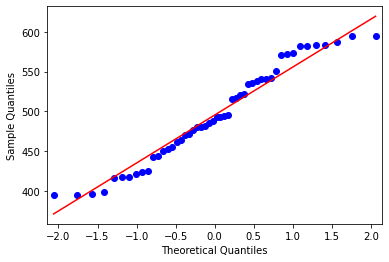

In [42]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(df.S1_treated, line='s')
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0f0e01110>,
      dtype=object)

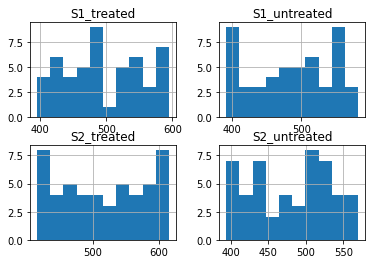

In [41]:
df.hist()